In [1]:
# Primero importemos los paquetes necesarios

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
# Generaramos una transformación para normalizar el conjunto de datos
transform = transforms.Compose([transforms.Resize(28),
                               transforms.CenterCrop(28),transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Descargamos el conjunto de datos de entrenamiento
trainset = datasets.FashionMNIST('Fashion/', download=True, train=True, transform=transform)
# Cargamos el conjunto
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Descargamos y cargamos el conjunto de prueba
testset = datasets.FashionMNIST('Fashion/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [3]:
# Ordenamos los datos para tener parejas de imagenes con su respectiva clase

# Los datos se encuentran en trainloader asi que generamos un iterador para extraerlos uno por uno
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([1, 28, 28])

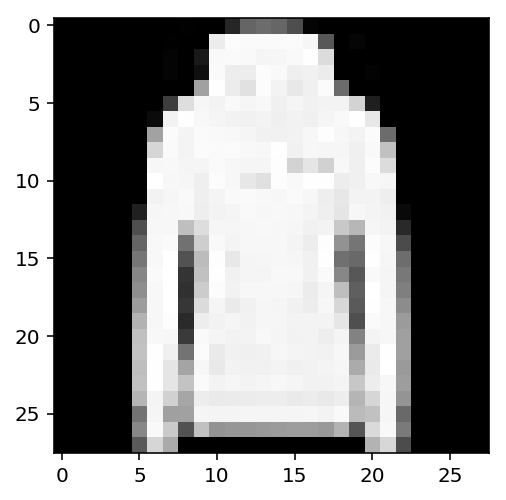

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');
images[1].size()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


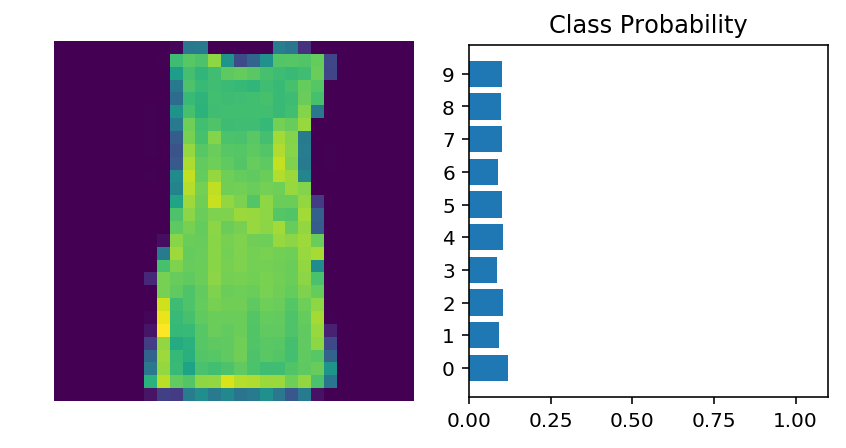

In [5]:
# Hyperparameters for our network
input_size = 784 #caracteristicas
hidden_sizes = [128, 64] #capas,neuronas
output_size = 10 #clases

# Build a feed-forward network
                                    # 784     #128
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [6]:
# importamos paquetes de pytorch

from torch import nn
from torch import optim
import torch.nn.functional as F

In [17]:
class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()
        # Definir las capas. Cada una con 128, 64 y 10 unidades respectivamente
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Capa de salida con 10 units (una para cada dígito)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Pase frontal de la red, regresamos las probabilidades '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = RedNeuronal()
model

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
#Inicializamos pesos y sesgos

pri neuronal dando nt(model.fc1.weight)
print(model.fc1.bias)
# Colocamos ceros
model.fc1.bias.data.fill_(0)
# muestreamos desde una distribución normal con media cero y desv. estandar = 0.01
model.fc1.weight.data.normal_(std=0.01) #tensor que contiene los pesos
#Pase frontal

Parameter containing:
tensor([[-0.0274,  0.0338, -0.0324,  ...,  0.0301, -0.0357, -0.0275],
        [ 0.0345, -0.0112, -0.0212,  ...,  0.0238, -0.0016,  0.0030],
        [ 0.0098, -0.0117, -0.0234,  ..., -0.0255, -0.0104,  0.0275],
        ...,
        [ 0.0166, -0.0164, -0.0356,  ..., -0.0351,  0.0058,  0.0106],
        [-0.0223, -0.0053, -0.0169,  ...,  0.0118, -0.0170,  0.0338],
        [-0.0037,  0.0184,  0.0121,  ...,  0.0010,  0.0008, -0.0342]],
       requires_grad=True)
Parameter containing:
tensor([-0.0189,  0.0054, -0.0065,  0.0084, -0.0172, -0.0280,  0.0208,  0.0170,
         0.0157, -0.0173, -0.0069,  0.0156,  0.0016,  0.0258,  0.0149,  0.0005,
        -0.0188,  0.0141,  0.0336,  0.0254,  0.0138,  0.0131, -0.0084,  0.0254,
        -0.0139, -0.0225,  0.0349,  0.0079,  0.0240, -0.0065, -0.0282, -0.0288,
        -0.0314,  0.0054, -0.0065, -0.0239,  0.0090,  0.0126,  0.0234, -0.0188,
        -0.0298,  0.0104,  0.0225,  0.0151,  0.0248,  0.0064,  0.0025, -0.0203,
        -0.0130

tensor([[-0.0002, -0.0056, -0.0158,  ...,  0.0050, -0.0063, -0.0057],
        [ 0.0123, -0.0054, -0.0099,  ..., -0.0037, -0.0252, -0.0035],
        [ 0.0106,  0.0064, -0.0039,  ...,  0.0116, -0.0009,  0.0060],
        ...,
        [-0.0031,  0.0055,  0.0043,  ...,  0.0043, -0.0081,  0.0106],
        [ 0.0087,  0.0031, -0.0050,  ..., -0.0030,  0.0146, -0.0013],
        [-0.0052, -0.0094, -0.0161,  ..., -0.0091, -0.0045,  0.0147]])

In [9]:
#Pase frontal, convertir la imagen a un tensor y pasarla a través de la red.
# Obtengamos el siguiente valor 
#dataiter = iter(trainloader)
images, labels = dataiter.next()

# Reestructuremos la imagen a un vector de una dimensión, hay quie le llama a esta operación "aplanado".
# La nueva forma será (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# alternativa: images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Pase frontal de la red
img_idx = 0
ps = model.forward(images[img_idx,:])

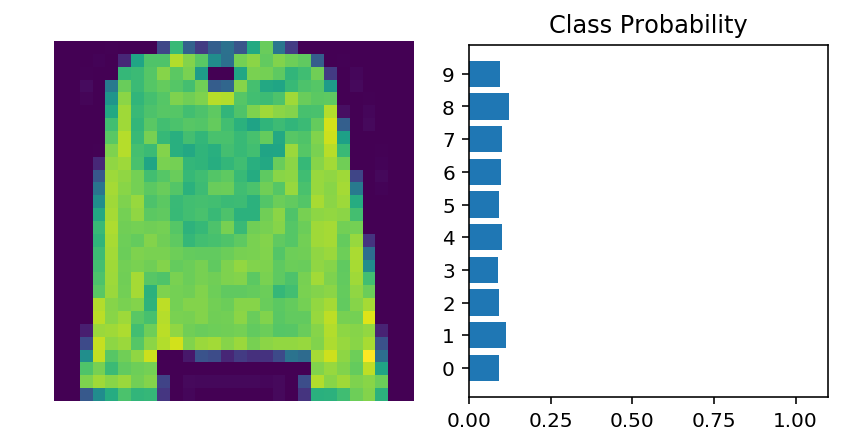

In [10]:
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [11]:
#Entrenamiento de una RN
# Cargamos paquetes necesarios

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

#helper was developed by Udacity under MIT license
import helper


In [12]:
class RedNeuronal(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p = 0.5):
        '''
        Construye una red de tamaño arbitrario.
        
        Parámetros:
        input_size: cantidad de elementos en la entrada
        output_size: cantidada de elementos en la salida 
        hidden_layers: cantidad de elementos por cada capa oculta
        drop_p: probabilidad de "tirar" (drop) una neurona [0,1] 
        '''
        # llamamos al constructor de la superclase
        super().__init__()
        
        # Agregamos la primera capa
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # agregamos cada una de las capas, zip empareja el número de entradas con las salidas
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        # agregamos la capa de salida final de la red
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        # Incluimos drop-out en la red
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Pase hacia adelante en la red, el regreso son las probabilidades en el dominio log '''
        
        # Hacemos un pase frontal en cada una de las capas ocultas, 
        # La funció de activación es un RELU combinado con dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

In [13]:
# Create the network, define the criterion and optimizer
model = RedNeuronal(784, 10, [516, 256], drop_p=0.5) #red neuronal
criterion = nn.NLLLoss() #criterios, error 
optimizer = optim.Adam(model.parameters(), lr=0.001) #combina el gradiente descendiente estocástico con el momentum.

In [14]:
# Implementamos una función de evaluación
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        images.resize_(images.shape[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [15]:
#hiperparámetro
epochs = 2
steps = 0
running_loss = 0
print_every = 1000
for e in range(epochs):
    # Cambiamos a modo entrenamiento
    model.train()
    for images, labels in trainloader:
        steps += 1
        
        # Aplanar imágenes a un vector de 784 elementos
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        # Backprogamation
        loss.backward()
        # Optimización
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            
            # Cambiamos a modo de evaluación
            """
            model.eval()
            
            # Apagamos los gradientes, reduce memoria y cálculos
            with torch.no_grad():
                test_loss, accuracy = validation(model, testloader, criterion)
            """
            test_loss = 1
            accuracy = 0
                
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            
            running_loss = 0
            
            # Make sure training is back on
            model.train()

Epoch: 2/2..  Training Loss: 0.608..  Test Loss: 0.006..  Test Accuracy: 0.000


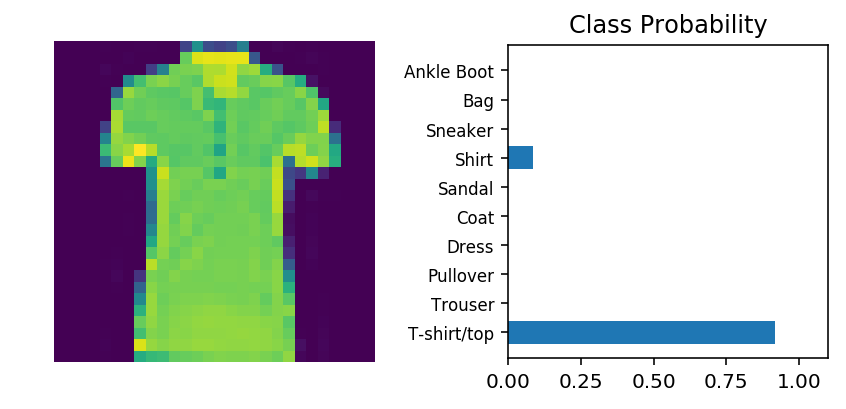

In [16]:
# Probemos la red!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Aplanamos la imagenes
img = img.view(1, 784)

# Estimamos para cada imagen la probabilidad de pertenencia a una clase (softmax)
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Graficamos
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')